<a href="https://colab.research.google.com/github/kweenkeen/ProofMode/blob/main/proof_data_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from google.colab import files

files.upload()

Saving ProofMode_Collection_2022-01-09_Practice_14.csv to ProofMode_Collection_2022-01-09_Practice_14.csv


{'ProofMode_Collection_2022-01-09_Practice_14.csv': b'File Hash SHA256,Locale,SafetyCheckCtsMatch,Location.Provider,IPv6,IPv4,Location.Accuracy,Location.Latitude,Language,NetworkType,Network,Manufacturer,DataType,Hardware,ScreenSize,Wifi MAC,Notes,DeviceID,Location.Longitude,Location.Bearing,SafetyCheckBasicIntegrity,Location.Time,File Modified,CellInfo,SafetyCheck,Location.Altitude,SafetyCheckTimestamp,Proof Generated,File Path,Location.Speed,Unnamed: 30\r\n07ec212ec53e975a61e72dcbe6865d33dfcce77788f3ce11eaaaacb7fdb427a3,USA,nan,gps,FE80::8FC3:7875:F5EE:438 2607:FC20:E81:5659:8FC3:7875:F5EE:438 FE80::94F1:1CFF:FEF9:463B FE80::9CD0:D2FF:FEEB:8C96 FE80::DA55:7696:6384:D89E FE80::EF0A:8069:82A0:3C7D FE80::930E:4562:2A25:FD92 FE80::1E0A:D05A:9B8:AB3B 2607:FB90:E7D:CA21:1E0A:D05A:9B8:AB3B ,192.168.29.208 192.168.200.1 192.0.0.4 ,18.893772,42.32857654,English,Wifi,Connected,Google,Mobile Data LTE,Google Pixel 4a,5.447290485,nan,nan,5upgzgbtn4s5kkg3m29v2in2e,-71.12502723,248.9,nan,1.64E+12,S

In [165]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.backends.backend_pdf import PdfPages

filename = input("Please enter the name of your file: ")

df = pd.read_csv(filename)

Please enter the name of your file: ProofMode_Collection_2022-01-09_Practice_14.csv


In [209]:
Device_ID_Unique = df['DeviceID'].tolist()
Device_ID_Unique = set(Device_ID_Unique)
print(Device_ID_Unique)

{'4upgzgbtn4s5kkg3m29v2in2e', '34pgzgbtn4s5kkg3m29v2in2e', '3upgzgbtn4s5kkg3m29v2in2e', '8upgzgbtn4s5kkg3m29v2in2e', '35pgzgbtn4s5kkg3m29v2in2e', '6upgzgbtn4s5kkg3m29v2in2e', '36pgzgbtn4s5kkg3m29v2in2e', '9upgzgbtn4s5kkg3m29v2in2e', '5upgzgbtn4s5kkg3m29v2in2e', '33pgzgbtn4s5kkg3m29v2in2e', '32pgzgbtn4s5kkg3m29v2in2e', '7upgzgbtn4s5kkg3m29v2in2e'}


In [210]:
new_id = 1
dict_id = dict.fromkeys(Device_ID_Unique, 0)

for i in Device_ID_Unique:
  dict_id[i] = new_id
  new_id += 1
print(dict_id)

{'4upgzgbtn4s5kkg3m29v2in2e': 1, '34pgzgbtn4s5kkg3m29v2in2e': 2, '3upgzgbtn4s5kkg3m29v2in2e': 3, '8upgzgbtn4s5kkg3m29v2in2e': 4, '35pgzgbtn4s5kkg3m29v2in2e': 5, '6upgzgbtn4s5kkg3m29v2in2e': 6, '36pgzgbtn4s5kkg3m29v2in2e': 7, '9upgzgbtn4s5kkg3m29v2in2e': 8, '5upgzgbtn4s5kkg3m29v2in2e': 9, '33pgzgbtn4s5kkg3m29v2in2e': 10, '32pgzgbtn4s5kkg3m29v2in2e': 11, '7upgzgbtn4s5kkg3m29v2in2e': 12}


In [211]:
updated_df = df.replace({"DeviceID": dict_id})

In [212]:
updated_df.head()

,File Hash SHA256,Locale,SafetyCheckCtsMatch,Location.Provider,IPv6,IPv4,Location.Accuracy,Location.Latitude,Language,NetworkType,Network,Manufacturer,DataType,Hardware,ScreenSize,Wifi MAC,Notes,DeviceID,Location.Longitude,Location.Bearing,SafetyCheckBasicIntegrity,Location.Time,File Modified,CellInfo,SafetyCheck,Location.Altitude,SafetyCheckTimestamp,Proof Generated,File Path,Location.Speed,Unnamed: 30
0,07ec212ec53e975a61e72dcbe6865d33dfcce77788f3ce...,USA,NaN,gps,FE80::8FC3:7875:F5EE:438 2607:FC20:E81:5659:8F...,192.168.29.208 192.168.200.1 192.0.0.4,18.893772,42.328577,English,Wifi,Connected,Google,Mobile Data LTE,Google Pixel 4a,5.44729,NaN,NaN,9,-71.125027,248.9,NaN,1.640000e+12,Saturday January 8 2022 2:00:58 PM Eastern S...,"[{""cellId"":12735497 ""tac"":21775 ""dbm"":-105} {""...",NaN,-28.255188,NaN,Sunday January 9 2022 10:31:38 AM Eastern St...,/storage/emulated/0/DCIM/Camera/PXL_20220108_1...,1.36,NaN
1,0e6e32c7b0f35a8b7c9cdc73622fdf572dceb2971913b8...,USA,NaN,gps,FE80::8FC3:7875:F5EE:438 2607:FC20:E81:5659:8F...,192.168.29.208 192.168.200.1 192.0.0.4,17.893482,42.328577,English,Wifi,Connected,Google,Mobile Data LTE,Google Pixel 4a,5.44729,NaN,NaN,9,-71.125027,248.9,NaN,1.640000e+12,Saturday January 8 2022 2:00:59 PM Eastern S...,"[{""cellId"":12735497 ""tac"":21775 ""dbm"":-105} {""...",NaN,-28.255188,NaN,Sunday January 9 2022 10:27:05 AM Eastern St...,/storage/emulated/0/DCIM/Camera/PXL_20220108_1...,1.36,NaN
2,141c7b8aa75e5f862511d1b64bedd61c4c25daceea57f6...,USA,NaN,gps,FE80::8FC3:7875:F5EE:438 2607:FC20:E81:5659:8F...,192.168.29.208 192.168.200.1 192.0.0.4,17.893482,42.328577,Spanish,Wifi,Connected,Google,Mobile Data LTE,Google Pixel 4a,5.44729,NaN,NaN,1,-71.125027,248.9,NaN,1.640000e+12,Saturday January 8 2022 12:53:52 PM Eastern ...,"[{""cellId"":12735497 ""tac"":21775 ""dbm"":-105} {""...",NaN,-28.255188,NaN,Sunday January 9 2022 10:36:46 AM Eastern St...,/storage/emulated/0/DCIM/Camera/PXL_20220108_1...,1.36,NaN
3,07ec212ec53e975a61e72dcbe6865d33dfcce77788f3ce...,USA,NaN,gps,FE80::8FC3:7875:F5EE:438 2607:FC20:E81:5659:8F...,192.168.29.208 192.168.200.1 192.0.0.4,17.893482,42.328577,English,Wifi,Connected,Google,Mobile Data LTE,Google Pixel 4a,5.44729,NaN,NaN,3,-71.125027,248.9,NaN,1.640000e+12,Saturday January 8 2022 2:00:58 PM Eastern S...,"[{""cellId"":12735497 ""tac"":21775 ""dbm"":-105} {""...",NaN,-28.255188,NaN,Sunday January 9 2022 10:31:38 AM Eastern St...,/storage/emulated/0/DCIM/Camera/PXL_20220108_1...,1.36,NaN
4,17c50375b30ecd9abe405187d30a1a99ed98de44ecca2d...,USA,NaN,gps,FE80::8FC3:7875:F5EE:438 2607:FC20:E81:5659:8F...,192.168.29.208 192.168.200.1 192.0.0.4,17.893482,42.328577,English,Wifi,Connected,Google,Mobile Data LTE,Google Pixel 4a,5.44729,NaN,NaN,11,-71.125027,248.9,NaN,1.640000e+12,Saturday January 8 2022 1:37:28 PM Eastern S...,"[{""cellId"":12735497 ""tac"":21775 ""dbm"":-105} {""...",NaN,-28.255188,NaN,Sunday January 9 2022 10:31:48 AM Eastern St...,/storage/emulated/0/DCIM/Camera/PXL_20220108_1...,1.36,NaN


In [213]:
!pip install PyPDF2

In [214]:
updated_df = updated_df.rename(columns={'File Hash SHA256': 'File_Hash_SHA256', 'Location.Provider': 'Location_Provider', 'Location.Accuracy':'Location_Accuracy', 'Location.Latitude': 'Location_Latitude', 'Wifi MAC': 'Wifi_MAC', 'Location.Longitude':'Location_Longitude', 'Location.Bearing':'Location_Bearing', 'Location.Time':'Location_Time', 'File Modified':'File_Modified', 'Location.Altitude':'Location_Altitude', 'Proof Generated':'Proof_Generated', 'File Path':'File_Path', 'Location.Speed':'Location_Speed' })

In [215]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

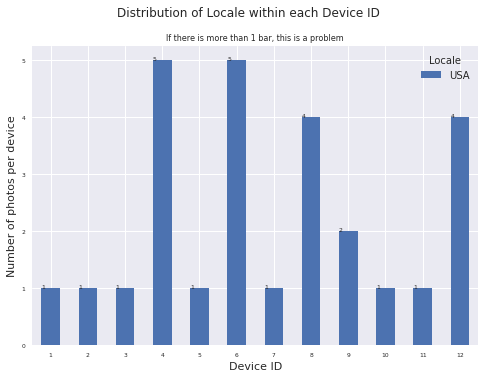

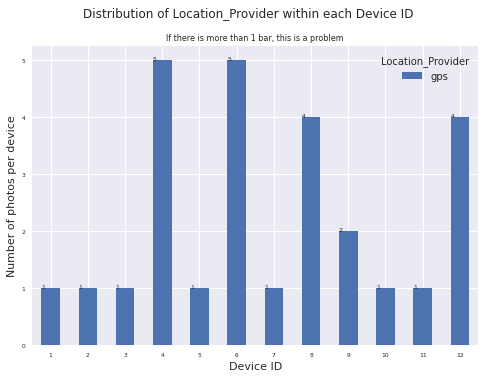

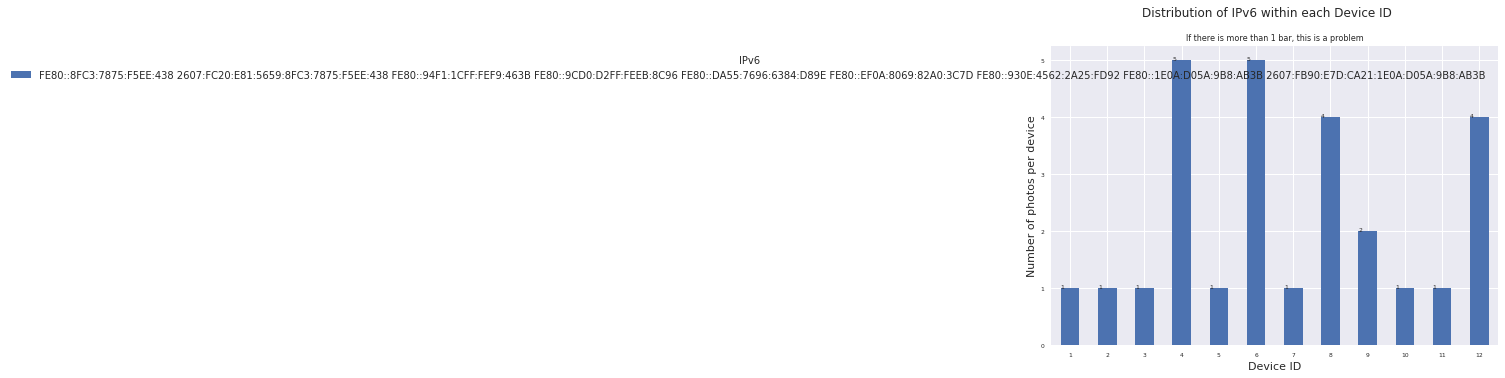

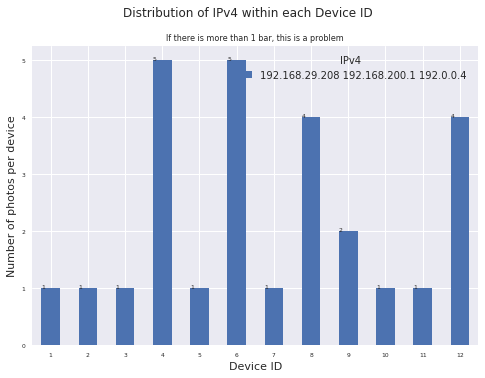

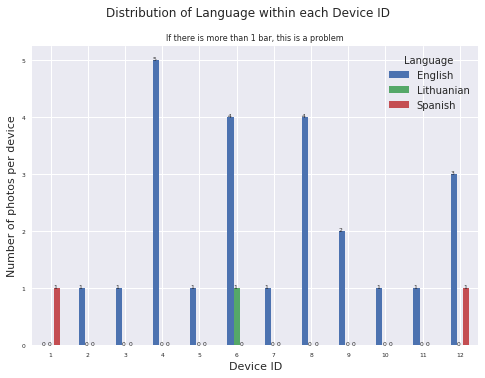

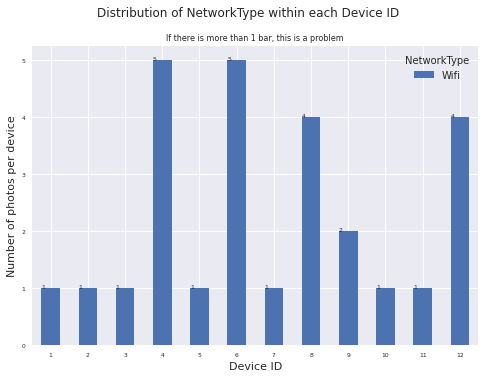

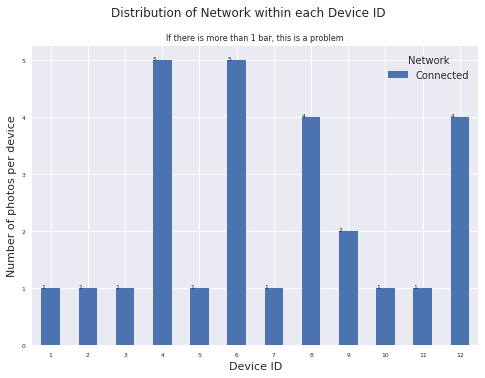

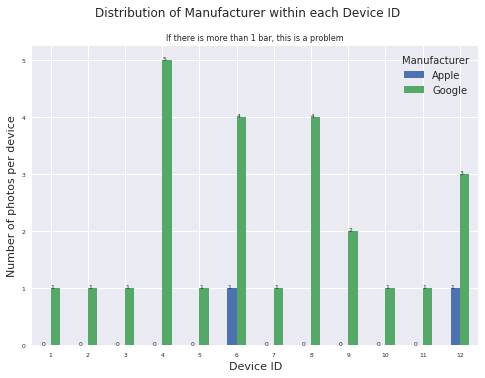

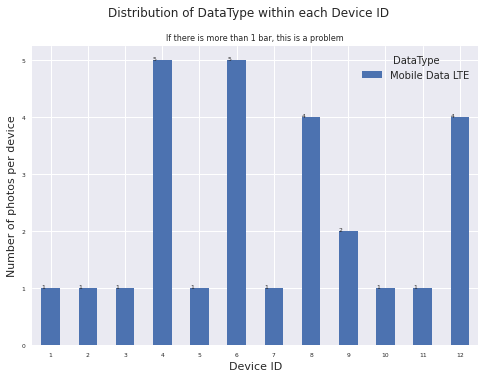

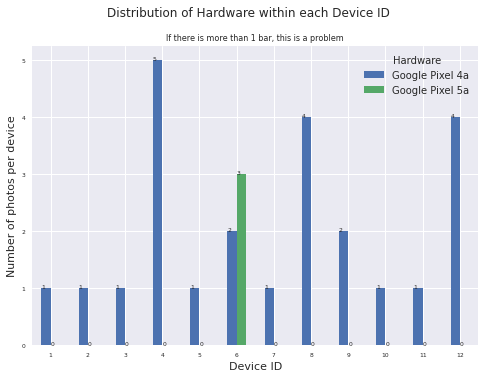

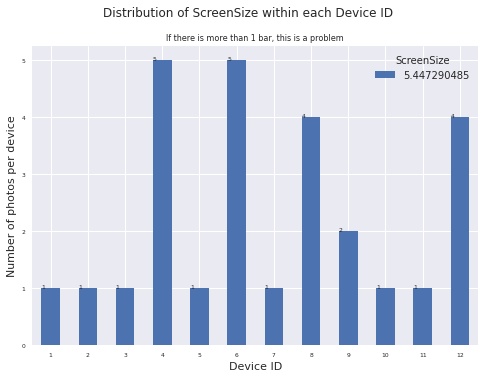

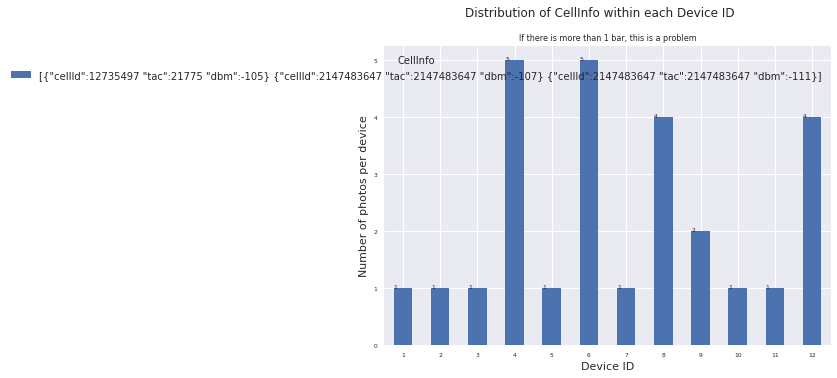

In [222]:
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
from PyPDF2 import PdfFileMerger
from google.colab import files
from matplotlib import rcParams
# rc('font',**{'family':'serif','serif':['Rockwell']})
# # rc('text', usetex=True)
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Verdana']

plt.style.use('seaborn')
plt.rcParams.update({'font.sans-serif':'Verdana'})

hardware_software_metdata_list = ['Locale', 'Location_Provider', 'IPv6', 'IPv4','Language', 'NetworkType', 'Network', 'Manufacturer', 'DataType', 'Hardware', 'ScreenSize', 'CellInfo']

merger = PdfFileMerger()
result_page = PdfPages('result.pdf')

for i in hardware_software_metdata_list:
  file_name = f'Hardware_Software_Proof_{i}.pdf'
  with PdfPages(file_name) as pdf:
    ax = pd.crosstab(updated_df['DeviceID'],updated_df[i]).plot.bar(rot=0)
    plt.ylabel('Number of photos per device')
    plt.xlabel("Device ID")
    plt.suptitle('Distribution of '+ i + ' within each Device ID', fontsize=12)
    plt.title("If there is more than 1 bar, this is a problem", fontsize=8)
    plt.yticks(fontsize=6)
    plt.xticks(fontsize=6)
    

    for p in ax.patches:
      #ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
      ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()), fontsize=6)
      # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
      #       ncol=3, fancybox=True, shadow=True)
    pdf.savefig()
  merger.append(file_name)

merger.write('result.pdf')
merger.close()

files.download('result.pdf')

In [ ]:
print(matplotlib.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: white
axes.facecolor: #EAEAF2
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: 11.0
axes.labelweight: normal
axes.linewidth: 0.0
axes.prop_cycle: cycler('color', ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD'])
axes.spines.bottom: True
axes.spines.left: True
axe

In [ ]:
print(plt.rcParams['font.sans-serif'])

['Tahoma']
